# Oil v. Gold Comparison

You want to compare the monthly closing price of gold v. oil over the past decade.

The easiest way to uncover a pattern will be to line graph the data

The data can be [found here](https://drive.google.com/file/d/122tdS2eTZEq9q7bbKEZMf6168Vi8biRh/view?usp=share_link).



 

In [1]:
import pandas as pd

In [2]:
df_raw = pd.read_csv("oil-v-gold.csv")
df_raw

,GC1 Comdty (Gold),Unnamed: 1,Unnamed: 2,CL1 Comdty (Oil),Unnamed: 4
0,Date,PX_LAST,NaN,Date,PX_LAST
1,1/31/2008,922.7,NaN,1/31/2008,91.75
2,2/29/2008,975,NaN,2/29/2008,101.84
3,3/31/2008,916.2,NaN,3/31/2008,101.58
4,4/30/2008,865.1,NaN,4/30/2008,113.46
...,...,...,...,...,...
117,9/29/2017,1281.5,NaN,9/29/2017,51.67
118,10/31/2017,1270.5,NaN,10/31/2017,54.38
119,11/30/2017,1273.2,NaN,11/30/2017,57.4
120,12/29/2017,1309.3,NaN,12/29/2017,60.42


In [3]:
df_raw.sample(20)

,GC1 Comdty (Gold),Unnamed: 1,Unnamed: 2,CL1 Comdty (Oil),Unnamed: 4
102,6/30/2016,1320.6,NaN,6/30/2016,48.33
13,1/30/2009,927.3,NaN,1/30/2009,41.68
80,8/29/2014,1286.5,NaN,8/29/2014,95.96
52,4/30/2012,1664.2,NaN,4/30/2012,104.87
16,4/30/2009,891.2,NaN,4/30/2009,51.12
111,3/31/2017,1247.3,NaN,3/31/2017,50.6
97,1/29/2016,1116.4,NaN,1/29/2016,33.62
1,1/31/2008,922.7,NaN,1/31/2008,91.75
114,6/30/2017,1242.3,NaN,6/30/2017,46.04
17,5/29/2009,978.8,NaN,5/29/2009,66.31


In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GC1 Comdty (Gold)  122 non-null    object 
 1   Unnamed: 1         122 non-null    object 
 2   Unnamed: 2         0 non-null      float64
 3   CL1 Comdty (Oil)   122 non-null    object 
 4   Unnamed: 4         122 non-null    object 
dtypes: float64(1), object(4)
memory usage: 4.9+ KB


## What is our approach (pseudocode):

# Fix it
## drop duplicates and nan values
## convert objects into floating point numbers
## drop column names, provide sensical
## rename gold and oil columns

In [5]:
## drop duplicates
df_raw.columns

Index(['GC1 Comdty (Gold)', 'Unnamed: 1', 'Unnamed: 2', 'CL1 Comdty (Oil)',
       'Unnamed: 4'],
      dtype='object')

In [6]:
df = df_raw[['GC1 Comdty (Gold)', 'Unnamed: 1',
       'Unnamed: 4']]
df

,GC1 Comdty (Gold),Unnamed: 1,Unnamed: 4
0,Date,PX_LAST,PX_LAST
1,1/31/2008,922.7,91.75
2,2/29/2008,975,101.84
3,3/31/2008,916.2,101.58
4,4/30/2008,865.1,113.46
...,...,...,...
117,9/29/2017,1281.5,51.67
118,10/31/2017,1270.5,54.38
119,11/30/2017,1273.2,57.4
120,12/29/2017,1309.3,60.42


In [7]:
df.sample(20)

,GC1 Comdty (Gold),Unnamed: 1,Unnamed: 4
105,9/30/2016,1313.3,48.24
92,8/31/2015,1132,49.2
84,12/31/2014,1184.1,53.27
49,1/31/2012,1737.8,98.48
102,6/30/2016,1320.6,48.33
103,7/29/2016,1349,41.6
48,12/30/2011,1566.8,98.83
34,10/29/2010,1357.6,81.43
64,4/30/2013,1472.1,93.46
66,6/28/2013,1223.7,96.56


In [8]:
## rename column headers

df.columns = ["closing_date", "px_gold", "px_oil"]
df

,closing_date,px_gold,px_oil
0,Date,PX_LAST,PX_LAST
1,1/31/2008,922.7,91.75
2,2/29/2008,975,101.84
3,3/31/2008,916.2,101.58
4,4/30/2008,865.1,113.46
...,...,...,...
117,9/29/2017,1281.5,51.67
118,10/31/2017,1270.5,54.38
119,11/30/2017,1273.2,57.4
120,12/29/2017,1309.3,60.42


In [9]:
## delete top row
## reset index
df = df.drop(0).reset_index(drop = True)
df

,closing_date,px_gold,px_oil
0,1/31/2008,922.7,91.75
1,2/29/2008,975,101.84
2,3/31/2008,916.2,101.58
3,4/30/2008,865.1,113.46
4,5/30/2008,887.3,127.35
...,...,...,...
116,9/29/2017,1281.5,51.67
117,10/31/2017,1270.5,54.38
118,11/30/2017,1273.2,57.4
119,12/29/2017,1309.3,60.42


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   closing_date  121 non-null    object
 1   px_gold       121 non-null    object
 2   px_oil        121 non-null    object
dtypes: object(3)
memory usage: 3.0+ KB


In [11]:
## convert to floating point numbers gold
df["px_gold"] = pd.to_numeric(df["px_gold"], errors = "coerce")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   closing_date  121 non-null    object 
 1   px_gold       121 non-null    float64
 2   px_oil        121 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.0+ KB


In [12]:
## convert to floating point numbers oil
df["px_oil"] = pd.to_numeric(df["px_oil"], errors = "coerce").copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   closing_date  121 non-null    object 
 1   px_gold       121 non-null    float64
 2   px_oil        121 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.0+ KB


In [13]:
df

,closing_date,px_gold,px_oil
0,1/31/2008,922.7,91.75
1,2/29/2008,975.0,101.84
2,3/31/2008,916.2,101.58
3,4/30/2008,865.1,113.46
4,5/30/2008,887.3,127.35
...,...,...,...
116,9/29/2017,1281.5,51.67
117,10/31/2017,1270.5,54.38
118,11/30/2017,1273.2,57.40
119,12/29/2017,1309.3,60.42


In [14]:
## export to csv for a clean copy of data
df.to_csv("oil-v-gold-export.csv", index = False, encoding = "UTF8")

<AxesSubplot:xlabel='closing_date'>

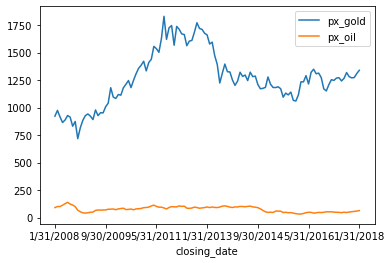

In [15]:
## create quick line graphs of oil v. gold
df.plot(x="closing_date",
        y= ["px_gold", "px_oil"])

In [16]:
df

,closing_date,px_gold,px_oil
0,1/31/2008,922.7,91.75
1,2/29/2008,975.0,101.84
2,3/31/2008,916.2,101.58
3,4/30/2008,865.1,113.46
4,5/30/2008,887.3,127.35
...,...,...,...
116,9/29/2017,1281.5,51.67
117,10/31/2017,1270.5,54.38
118,11/30/2017,1273.2,57.40
119,12/29/2017,1309.3,60.42


In [18]:
## pct change calculation for gold using iat

## fixed value
old_gold = df["px_gold"].iat[0]
old_gold

922.7

In [22]:
df["gold_pct_chg"] = \
((df["px_gold"] - old_gold) / old_gold) * 100

df

,closing_date,px_gold,px_oil,gold_pct_chg
0,1/31/2008,922.7,91.75,0.000000
1,2/29/2008,975.0,101.84,5.668148
2,3/31/2008,916.2,101.58,-0.704454
3,4/30/2008,865.1,113.46,-6.242549
4,5/30/2008,887.3,127.35,-3.836567
...,...,...,...,...
116,9/29/2017,1281.5,51.67,38.885878
117,10/31/2017,1270.5,54.38,37.693725
118,11/30/2017,1273.2,57.40,37.986344
119,12/29/2017,1309.3,60.42,41.898775


In [25]:
## iat for fixed old oil price
old_oil = df["px_oil"].iat[0]
old_oil

91.75

In [26]:
df["oil_pct_chg"] = \
((df["px_oil"] - old_oil) / old_oil) * 100

df

,closing_date,px_gold,px_oil,gold_pct_chg,oil_pct_chg
0,1/31/2008,922.7,91.75,0.000000,0.000000
1,2/29/2008,975.0,101.84,5.668148,10.997275
2,3/31/2008,916.2,101.58,-0.704454,10.713896
3,4/30/2008,865.1,113.46,-6.242549,23.662125
4,5/30/2008,887.3,127.35,-3.836567,38.801090
...,...,...,...,...,...
116,9/29/2017,1281.5,51.67,38.885878,-43.683924
117,10/31/2017,1270.5,54.38,37.693725,-40.730245
118,11/30/2017,1273.2,57.40,37.986344,-37.438692
119,12/29/2017,1309.3,60.42,41.898775,-34.147139


<AxesSubplot:xlabel='closing_date'>

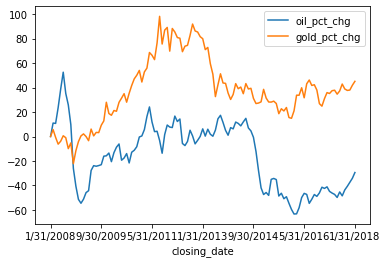

In [28]:
## basic line graph

df.plot(x = "closing_date",
       y = ["oil_pct_chg", "gold_pct_chg"])

<AxesSubplot:title={'center':'Oil v. Gold Over Time'}, xlabel='closing_date'>

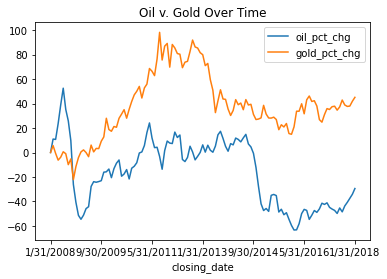

In [29]:
## add a title

df.plot(x = "closing_date",
       y = ["oil_pct_chg", "gold_pct_chg"],
       title = "Oil v. Gold Over Time")

<AxesSubplot:title={'center':'Oil v. Gold Over Time'}, xlabel='closing_date'>

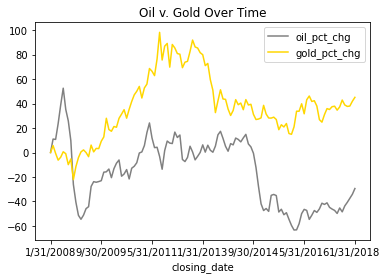

In [30]:
## why is gold organge and oil blue?

df.plot(x = "closing_date",
       y = ["oil_pct_chg", "gold_pct_chg"],
       title = "Oil v. Gold Over Time",
       style = {"oil_pct_chg": "gray",
               "gold_pct_chg": "gold"})